<a href="https://colab.research.google.com/github/janasamra/AirLines-delay/blob/main/Airlines_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries
import pandas as  pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## **Load Data**

In [2]:
ds=pd.read_csv(r"airlines_delay.csv")

In [3]:
ds.head()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0
3,31.0,1410.0,344.0,US,OGG,PHX,6,0
4,563.0,692.0,98.0,FL,BMI,ATL,4,0


In [4]:
ds.tail()

,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
539377,6973.0,530.0,72.0,OO,GEG,SEA,5,1
539378,1264.0,560.0,115.0,WN,LAS,DEN,4,1
539379,5209.0,827.0,74.0,EV,CAE,ATL,2,1
539380,607.0,715.0,65.0,WN,BWI,BUF,4,1
539381,6377.0,770.0,55.0,OO,CPR,DEN,2,1


In [5]:
ds.shape

(539382, 8)

In [6]:
ds.describe()

,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539382 entries, 0 to 539381
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Flight       539382 non-null  float64
 1   Time         539382 non-null  float64
 2   Length       539382 non-null  float64
 3   Airline      539382 non-null  object 
 4   AirportFrom  539382 non-null  object 
 5   AirportTo    539382 non-null  object 
 6   DayOfWeek    539382 non-null  int64  
 7   Class        539382 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 32.9+ MB


<Axes: xlabel='Airline', ylabel='count'>

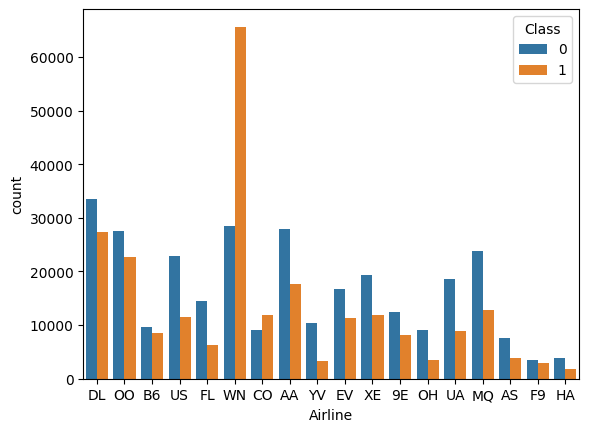

In [8]:
sns.countplot(x='Airline', hue='Class', data=ds)

## Handle Null Values

In [9]:
ds.isnull().sum()

Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [10]:
ds.dropna(inplace=True)

In [11]:
ds.nunique()

Flight         6585
Time           1131
Length          426
Airline          18
AirportFrom     293
AirportTo       293
DayOfWeek         7
Class             2
dtype: int64

In [12]:
#Checking the data types
ds.dtypes

Flight         float64
Time           float64
Length         float64
Airline         object
AirportFrom     object
AirportTo       object
DayOfWeek        int64
Class            int64
dtype: object

## Handle Outliers

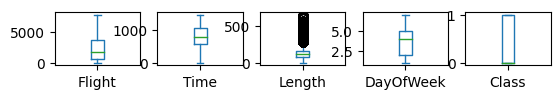

In [13]:
#boxploting each feature
ds.plot(kind="box",subplots=True,layout=(6,5))
plt.show()

<Axes: xlabel='Time'>

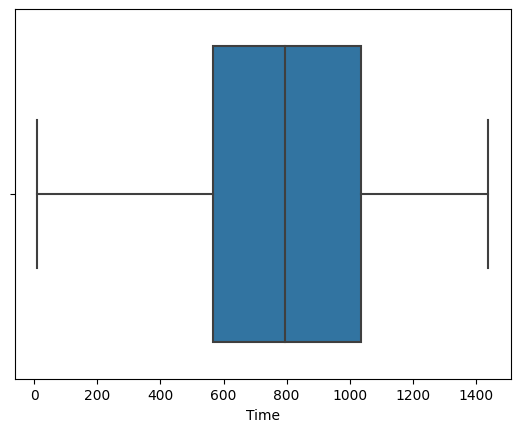

In [14]:
#Boxploting time feature
sns.boxplot(x=ds["Time"])

<Axes: xlabel='Length'>

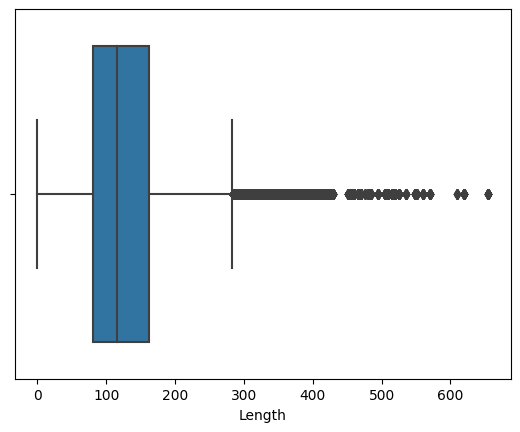

In [15]:
#Boxploting Length feature
sns.boxplot(x=ds["Length"])

<Axes: xlabel='Length'>

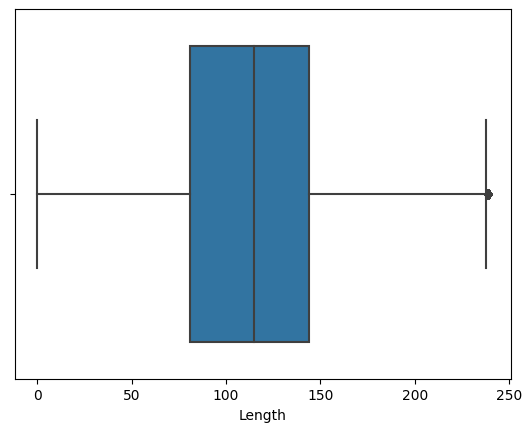

In [16]:
#Handling the outliers by replacing them with the mean of the feature
counter=0
for i in ds["Length"]:
    if i >=240:
        ds.iat[counter,2]=ds["Length"].mean()
    counter=counter+1

#Boxploting Length feature
sns.boxplot(x=ds["Length"])

<Axes: xlabel='DayOfWeek'>

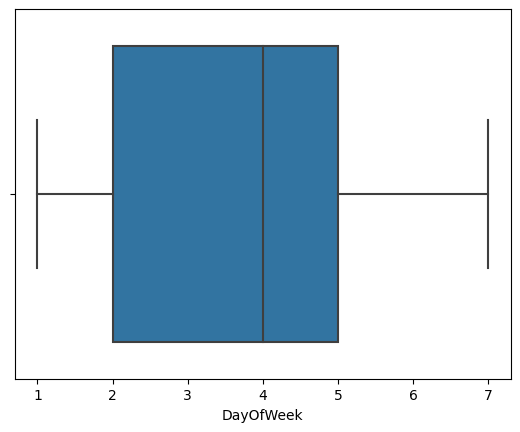

In [17]:
#Boxploting Airline feature
sns.boxplot(x=ds["DayOfWeek"])

## **Feature Engneering**

In [18]:
# Create a new column by concatenating "AirportFrom" and "AirportTo" columns
ds['Route'] = ds['AirportFrom'] + '-' + ds['AirportTo']
ds['Route'].head()

0    ATL-HOU
1    COS-ORD
2    BOS-CLT
3    OGG-PHX
4    BMI-ATL
Name: Route, dtype: object

In [19]:
# drop not needed data
ds=ds.drop(['AirportFrom','AirportTo'],axis=1)

In [20]:
#Converting Flight, Time and Length features from float to integar
ds["Flight"]=ds["Flight"].astype("int32")
ds["Time"]=ds["Time"].astype("int32")
ds["Length"]=ds["Length"].astype("int32")
ds.dtypes

Flight        int32
Time          int32
Length        int32
Airline      object
DayOfWeek     int64
Class         int64
Route        object
dtype: object

In [21]:
ds.head()

,Flight,Time,Length,Airline,DayOfWeek,Class,Route
0,2313,1296,141,DL,1,0,ATL-HOU
1,6948,360,146,OO,4,0,COS-ORD
2,1247,1170,143,B6,3,0,BOS-CLT
3,31,1410,132,US,6,0,OGG-PHX
4,563,692,98,FL,4,0,BMI-ATL


In [22]:
#Get list of categorical variables
s = (ds.dtypes == 'object')
object_cols = list(s[s].index)

In [23]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
#Label Encoding object dtypes to numeric dtypes
for i in object_cols:
    ds[i]=ds[[i]].apply(LE.fit_transform)

In [24]:
ds.dtypes

Flight       int32
Time         int32
Length       int32
Airline      int64
DayOfWeek    int64
Class        int64
Route        int64
dtype: object

In [25]:
#Checking the data before modeling
ds.head()

,Flight,Time,Length,Airline,DayOfWeek,Class,Route
0,2313,1296,141,5,1,0,152
1,6948,360,146,12,4,0,793
2,1247,1170,143,3,3,0,424
3,31,1410,132,14,6,0,2922
4,563,692,98,8,4,0,359


### **check if Class column is balanced**

In [26]:
ds['Class'].value_counts()


0    299118
1    240264
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

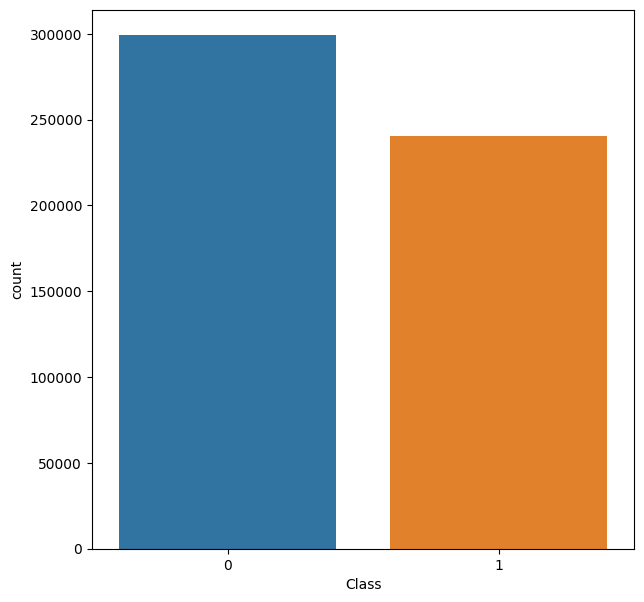

In [27]:
#data is kinda balanced
fig=plt.figure(figsize=(7,7))
sns.countplot(x='Class',data=ds)

In [28]:
#create two different dataframe of majority and minority class
from sklearn.utils import resample
cls_majority = ds[(ds['Class']==0)]
cls_minority = ds[(ds['Class']==1)]
#oversample
cls_minority_oversample = resample(cls_minority,
                                 replace=True,    #sample with replacement
                                 n_samples= 299118, #to match majority class
                                 random_state=42)  #reproducible results
# Combine majority class with upsampled minority class
db = pd.concat([cls_minority_oversample, cls_majority])

<Axes: xlabel='Class', ylabel='count'>

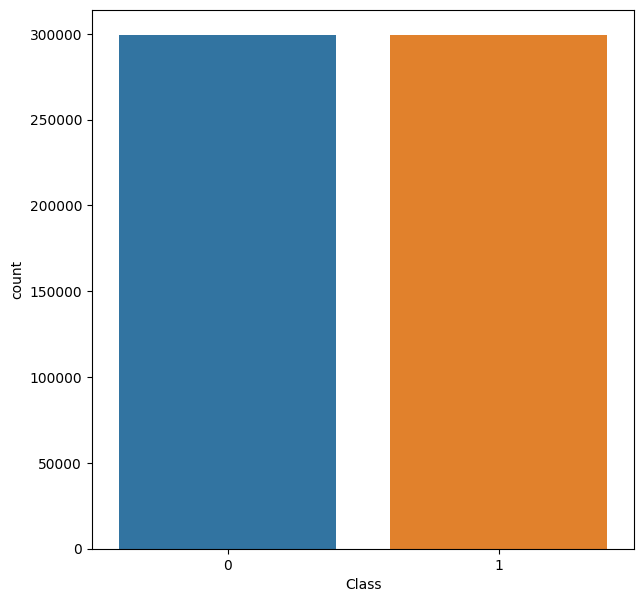

In [29]:
fig=plt.figure(figsize=(7,7))
sns.countplot(x='Class',data=db)

In [30]:
ds.head()

,Flight,Time,Length,Airline,DayOfWeek,Class,Route
0,2313,1296,141,5,1,0,152
1,6948,360,146,12,4,0,793
2,1247,1170,143,3,3,0,424
3,31,1410,132,14,6,0,2922
4,563,692,98,8,4,0,359


In [31]:
df=ds.drop('Class',axis=1)

## **Split** **data**

In [32]:
from sklearn.model_selection import train_test_split
X = df
y = ds['Class']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
# a function for accuracy and confusion matrix
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
def model_Evaluate(y_actual, y_predicted):

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_actual, y_predicted))

    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_actual, y_predicted)

    categories  = ['negative','positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Reds',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

## **ML Model**

              precision    recall  f1-score   support

           0       0.58      0.76      0.66     59714
           1       0.53      0.33      0.40     48163

    accuracy                           0.57    107877
   macro avg       0.56      0.55      0.53    107877
weighted avg       0.56      0.57      0.55    107877

The model's accuracy on the training set is: 57.0334063336462%
The model's accuracy on the test set is: 56.89071813268816%


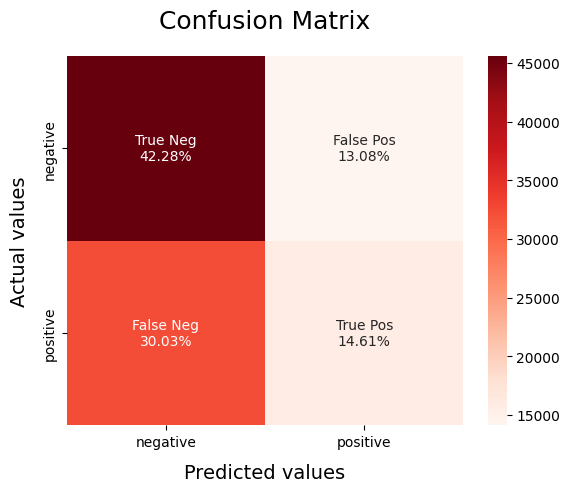

In [34]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
LRmodel_pred=LRmodel.predict(X_test)
model_Evaluate(y_test,LRmodel_pred)
print("The model's accuracy on the training set is: " + str(LRmodel.score(X_train,y_train)*100)+ "%")
print("The model's accuracy on the test set is: " + str(LRmodel.score(X_test,y_test)*100)+ "%")

              precision    recall  f1-score   support

           0       0.67      0.80      0.73     59714
           1       0.67      0.50      0.57     48163

    accuracy                           0.67    107877
   macro avg       0.67      0.65      0.65    107877
weighted avg       0.67      0.67      0.66    107877

The model's accuracy on the training set is: 68.06711393842481%
The model's accuracy on the test set is: 66.59250813426402%


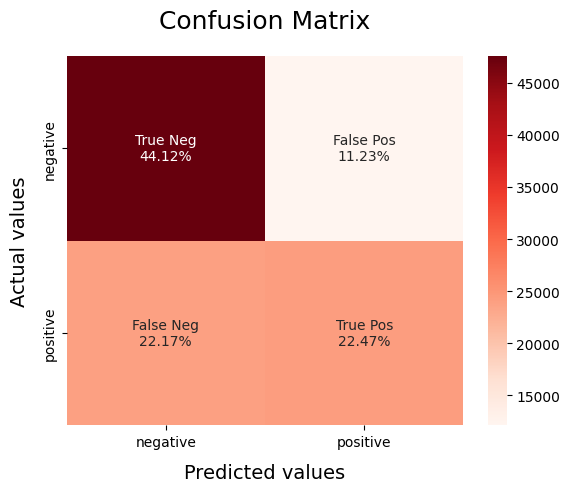

In [37]:
import xgboost as xgb
xgmodel=xgb.XGBClassifier()
xgmodel.fit(X_train,y_train)
xgmodel_pred=xgmodel.predict(X_test)
model_Evaluate(y_test,xgmodel_pred)
print("The model's accuracy on the training set is: " + str(xgmodel.score(X_train,y_train)*100)+ "%")
print("The model's accuracy on the test set is: " + str(xgmodel.score(X_test,y_test)*100)+ "%")

              precision    recall  f1-score   support

           0       0.67      0.80      0.73     59714
           1       0.67      0.50      0.57     48163

    accuracy                           0.67    107877
   macro avg       0.67      0.65      0.65    107877
weighted avg       0.67      0.67      0.66    107877

The model's accuracy on the training set is: 83.90285164714199%
The model's accuracy on the test set is: 62.04937104294706%


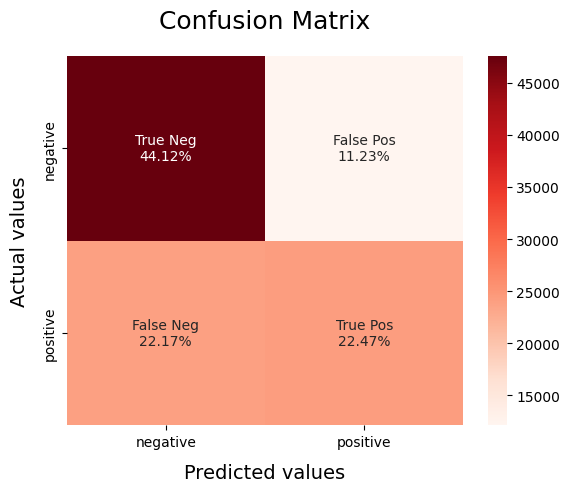

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
rfc_pred=xgmodel.predict(X_test)
model_Evaluate(y_test,xgmodel_pred)
print("The model's accuracy on the training set is: " + str(rfc.score(X_train,y_train)*100)+ "%")
print("The model's accuracy on the test set is: " + str(rfc.score(X_test,y_test)*100)+ "%")


## Xgboost is the model with the highest Test accuracy with 67%**bold text**